I used python libraries for data manipulation, Analysis and Visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Data analyst Data.csv')



In [5]:
# Display the first few rows of the DataFrame
print(df.head())

  First Name           Email ID  Quantity                  Events  \
0     ANIKET     aniket@xyz.com         1  Art of Resume Building   
1  Dhanshree  dhanshree@xyz.com         1  Art of Resume Building   
2     Dhiraj     dhiraj@xyz.com         1  Art of Resume Building   
3      Pooja      pooja@xyz.com         1  Art of Resume Building   
4     Aayush     aayush@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name  \
0       Attending  D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
1       Attending                   AP SHAH INSTITUTE OF TECHNOLOGY    
2       Attending       Don Bosco College of Engineering Fatorda Goa   
3       Attending           Pillai College of Engineering New Panvel   
4       Attending                               St Xavier's College    

        How did you come to know about this event?  \
0                                            Email   
1                                           

## About Data

In [6]:
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

 1.How many unique students are included in the dataset?

In [8]:
# Count the occurrences of each student (both unique and non-unique)
student_counts = df['First Name'].value_counts()

# Find the number of unique students
unique_students = student_counts.size

# Find the total number of students (including non-unique)
total_students = len(df)

# Find the count of non-unique students
non_unique_students = total_students - unique_students

# Display the counts
print("Number of unique students:", unique_students)
print("Number of non-unique students:", non_unique_students)
print("Total number of students:", total_students)

Number of unique students: 2324
Number of non-unique students: 2570
Total number of students: 4894


2.
What is the average GPA of students?

In [9]:
# Extract the column containing GPA values
gpa_column = df['CGPA']  # Replace 'gpa_column_name' with the actual column name

# Calculate the average GPA
average_gpa = gpa_column.mean()

print("Average GPA of students:", average_gpa)

Average GPA of students: 8.038475684511647


3:
What is the distribution of students across different graduation years?

In [10]:
# Group the data by graduation year and count the number of students in each year
student_distribution_by_year = df.groupby('Year of Graduation')['First Name'].count()

print("Distribution of students across different graduation years:")
print(student_distribution_by_year)

Distribution of students across different graduation years:
Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: First Name, dtype: int64


4 : What is the distribution of student's experience with Python programming?

In [11]:
# Get the count of each unique value in the 'Experience with python' column
experience_distribution = df['Experience with python (Months)'].value_counts()

print("Distribution of student experience with Python programming:")
print(experience_distribution)

Distribution of student experience with Python programming:
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


5. What is the average family income of the student?

In [12]:
def range_to_average_income(range_str):
    print("Input:", range_str)
    if range_str.endswith('+'):
        return float(range_str[:-1].replace('lakh', '')) * 100000 # Convert lakh to actual number
    else:
        low, high = map(lambda x: float(x.replace(' lakh', '')), range_str.split('-'))
        return (low + high) / 2 * 100000

In [13]:
def calculate_average_income_and_count_students(data):
    total_income = 0
    total_family = 0
    students_per_income = {}

    for range_str, count in data.items():
        average_income = range_to_average_income(range_str)
        total_income += average_income * count
        total_family += count

        # Assuming each student has a family income associated with them
        # You can modify this part based on how your data is structured
        students_per_income[range_str] = count

    if total_family == 0:
        return 0, students_per_income
    else:
        average_income = total_income / total_family
        return average_income, students_per_income

# Example dataset where keys are income ranges and values are the number of families
income_data = {
    '0-2 lakh': 100,
    '2-5 lakh': 150,
    '5-7 lakh': 80,
    '7 lakh+': 70
}

average_income, students_per_income = calculate_average_income_and_count_students(income_data)
print("Average Family Income:", average_income)

# Printing number of students for each income range
print("\nNumber of Students per Income Range:")
for income_range, student_count in students_per_income.items():
    print(f"{income_range}: {student_count}")


Input: 0-2 lakh
Input: 2-5 lakh
Input: 5-7 lakh
Input: 7 lakh+
Average Family Income: 398750.0

Number of Students per Income Range:
0-2 lakh: 100
2-5 lakh: 150
5-7 lakh: 80
7 lakh+: 70


In [14]:
# Assuming 'college' is the column containing college names and 'gpa' is the column containing GPA values
# Group the data by college and calculate the average GPA for each college
average_gpa_by_college = df.groupby('College Name')['CGPA'].mean()

# Display the average GPA for each college
print("Average GPA by college:")
print(average_gpa_by_college)

Average GPA by college:
College Name
A. C. Patil College of Engineering                                                   7.772973
ADHIYAMAAN COLLEGE OF ENGINEERING                                                    7.645455
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI       7.954545
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE                                8.266667
DKTE Society's Textile And Engineering Institute Ichalkaranji                        7.967568
Don Bosco College of Engineering Fatorda Goa                                         8.232143
G H Raisoni institut of engineering and technology pune                              7.889474
GOVERNMENT POLYTECHNIC GANDHINAGAR                                                   7.755000
KLE Society's College o

6:How does the GPA vary among different colleges? (Show top 5 results only)


In [15]:
# Assuming 'College Name' is the column containing college names and 'CGPA' is the column containing GPA values
# Group the data by college and calculate the average GPA for each college
average_gpa_by_college = df.groupby('College Name')['CGPA'].mean()

# Sort the colleges by average GPA in descending order and select the top 5
top_5_colleges = average_gpa_by_college.sort_values(ascending=False).head(5)

# Display the top 5 colleges by average GPA
print("Top 5 colleges by average GPA:")
print(top_5_colleges)

Top 5 colleges by average GPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


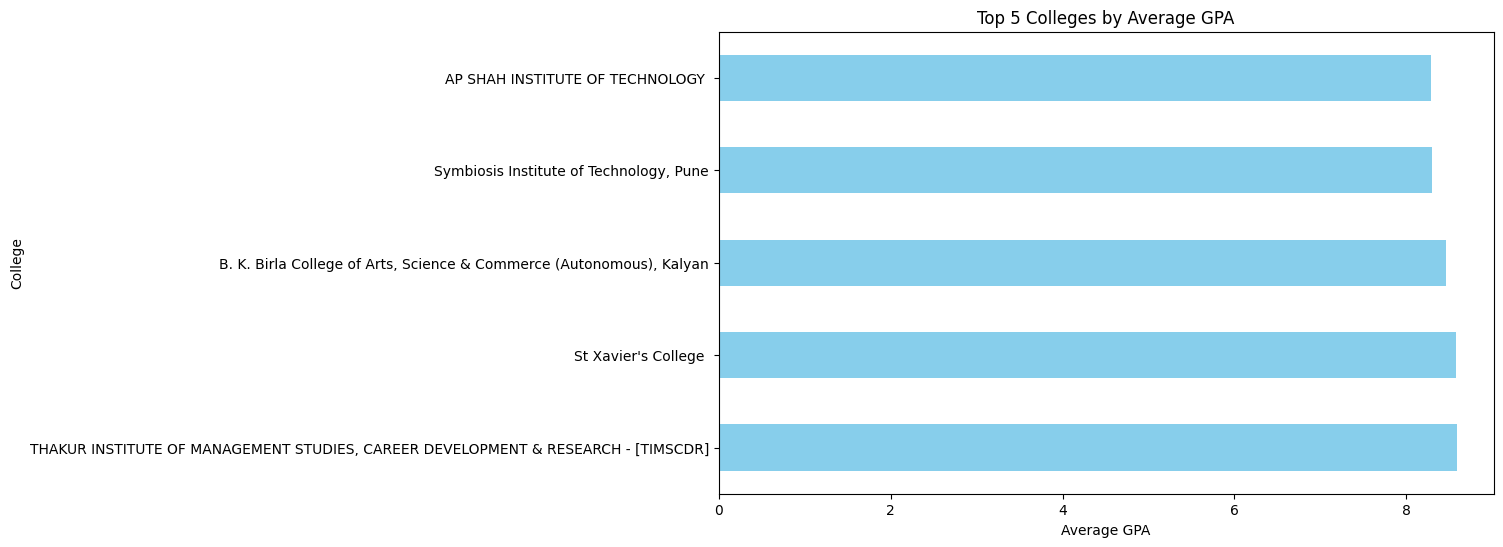

In [16]:
# Plot the top 5 colleges by average GPA (horizontal bar plot)
top_5_colleges.plot(kind='barh', color='skyblue', figsize=(10, 6))

# Set the title and labels
plt.title('Top 5 Colleges by Average GPA')
plt.xlabel('Average GPA')
plt.ylabel('College')

# Show the plot
plt.show()

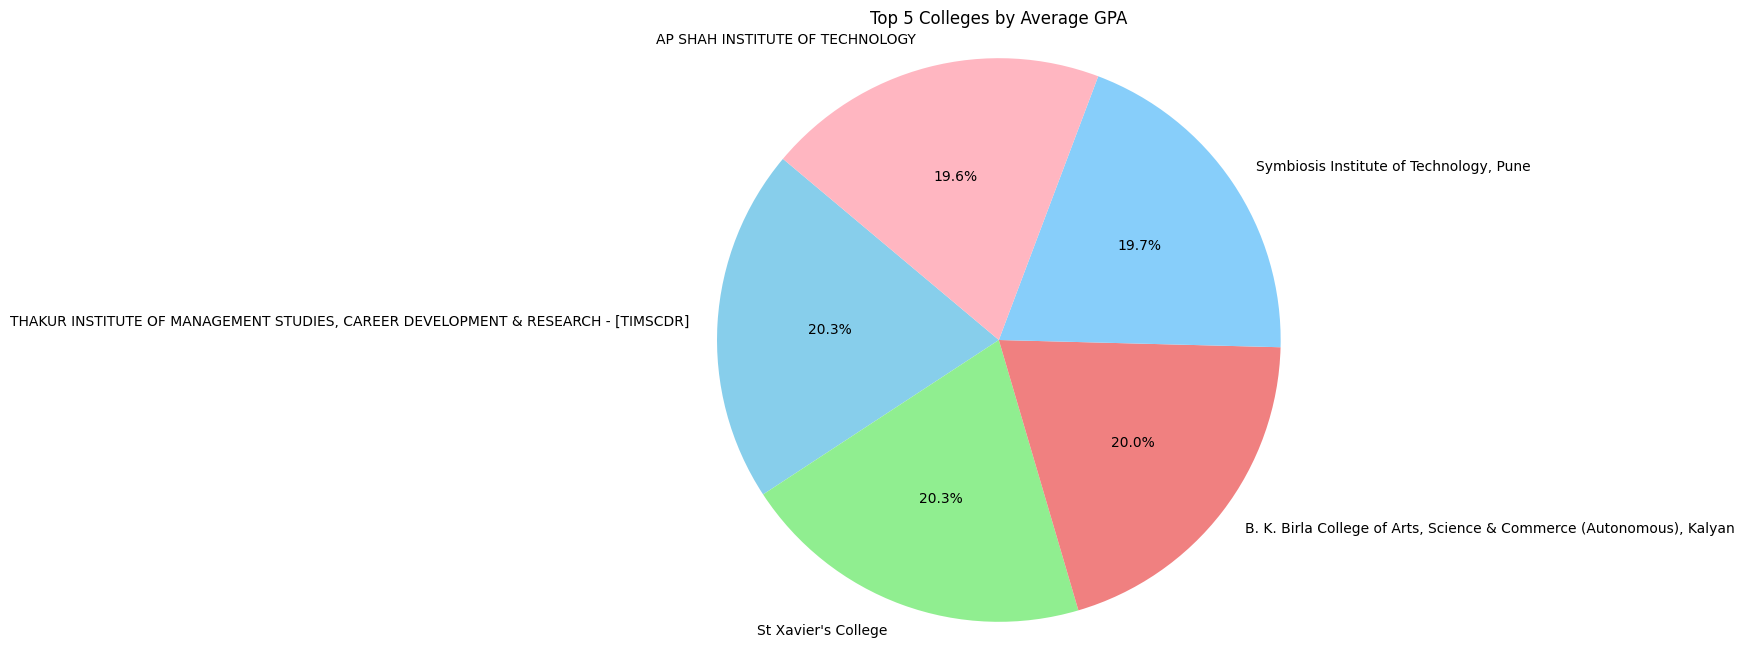

In [17]:
# Plot the top 5 colleges by average GPA (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(top_5_colleges, labels=top_5_colleges.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Top 5 Colleges by Average GPA')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

7:Are there any outliers in the quantity (number of courses completed) attribute?

In [18]:
# Assuming 'number_of_courses_completed' is the column containing the number of courses completed
# Calculate the interquartile range (IQR)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

# Display outliers
print("Potential outliers in the number of courses completed:")
print(outliers)

Potential outliers in the number of courses completed:
Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


In [19]:
# Print the column names
print(df.columns)

Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')


In [20]:
df.describe()

,Quantity,Year of Graduation,CGPA,Experience with python (Months),Expected salary (Lac)
count,4894.0,4894.000000,4894.000000,4894.000000,4894.000000
mean,1.0,2024.176951,8.038476,5.395586,13.935635
std,0.0,1.000180,1.005184,1.705364,6.451959
min,1.0,2023.000000,6.200000,3.000000,5.000000
25%,1.0,2023.000000,7.200000,4.000000,8.000000
50%,1.0,2024.000000,7.900000,5.000000,13.000000
75%,1.0,2025.000000,8.900000,7.000000,19.000000
max,1.0,2026.000000,9.900000,8.000000,35.000000


8:What is the average GPA for student from each city?

In [21]:
# Group the data by city and calculate the average GPA for each city
average_gpa_by_city = df.groupby('City')['CGPA'].mean()

print("Average GPA of students from each city:")
print(average_gpa_by_city)

Average GPA of students from each city:
City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


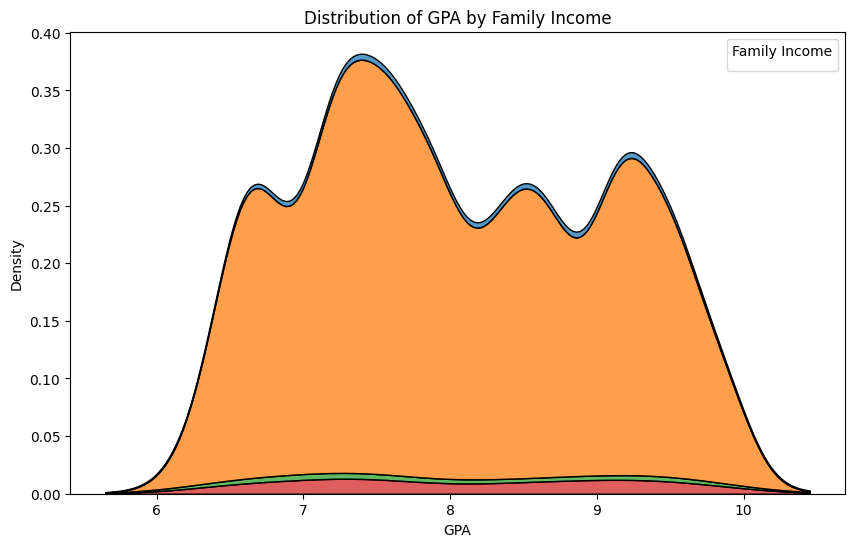

In [22]:
# Create a KDE plot of GPA for each category of family income
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CGPA', hue='Family Income', fill=True, multiple='stack')
plt.title('Distribution of GPA by Family Income')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.legend(title='Family Income')
plt.show()

10.How many students from various cities? (Solve using data visualisation tool).

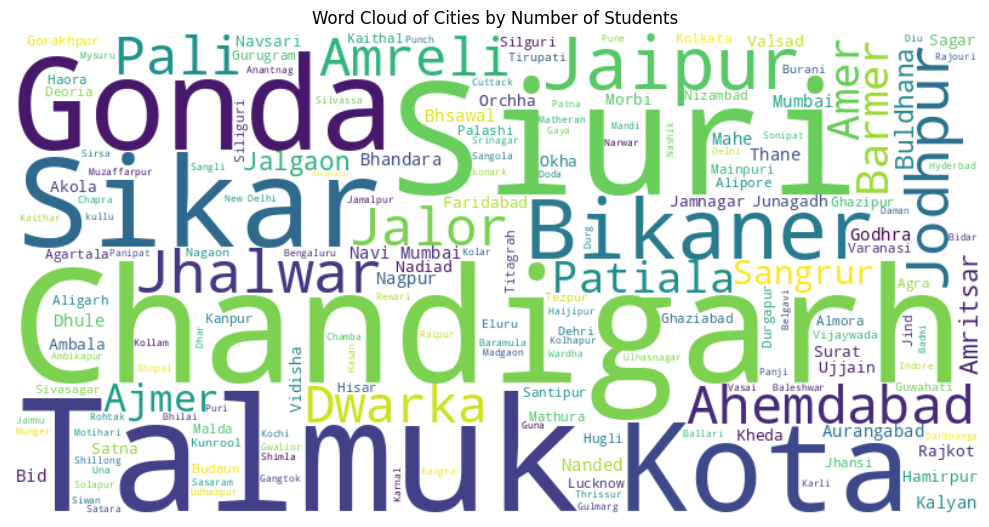

In [ ]:
from wordcloud import WordCloud
# Assuming 'City' is the column containing city information
city_counts = df['City'].value_counts()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(city_counts)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cities by Number of Students')
plt.axis('off')
plt.tight_layout()
plt.show()

11.How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)?

In [ ]:

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Data analyst Data.csv')

# Extracting the relevant columns
cgpa = df['CGPA']
family_income = df['Family Income']
python_experience_months = df['Experience with python (Months)']
expected_salary = df['Expected salary (Lac)']

# Analyze how expected salary varies based on each factor individually

# 1. CGPA
print("Expected salary (Lac) vs CGPA:")
cgpa_vs_salary = df.groupby('CGPA')['Expected salary (Lac)'].mean()
print(cgpa_vs_salary)
print("\nExplanation:")
print("CGPA (Cumulative Grade Point Average) is a measure of academic performance. This section shows how the average expected salary varies with different CGPA levels.")
print("Students with higher CGPA tend to have higher average expected salaries.")
print("For example, students with a CGPA of 6.2 have an average expected salary of around 12.0 lakh, while those with a CGPA of 9.9 have an average expected salary of around 16.37 lakh.")

# 2. Family Income
print("\nExpected salary (Lac) vs Family Income:")
income_vs_salary = df.groupby('Family Income')['Expected salary (Lac)'].mean()
print(income_vs_salary)
print("\nExplanation:")
print("This section illustrates the relationship between family income levels and average expected salaries.")
print("Students from families with higher income levels generally have higher average expected salaries.")
print("For example, students from families with a family income of 5-7 lakh have the highest average expected salary of around 15.69 lakh, while those from families with a lower income of 0-2 lakh have an average expected salary of around 13.87 lakh.")

# 3. Python Experience
print("\nExpected salary (Lac) vs Experience with python (Months):")
experience_vs_salary = df.groupby('Experience with python (Months)')['Expected salary (Lac)'].mean()
print(experience_vs_salary)
print("\nExplanation:")
print("This section demonstrates how the average expected salary varies based on the number of months of experience with Python programming language.")
print("Generally, students with more months of experience with Python tend to have higher average expected salaries.")
print("For example, students with 9 months of experience with Python have an average expected salary of around 14.93 lakh, while those with only 3 months of experience have an average expected salary of around 13.19 lakh.")


Expected salary (Lac) vs CGPA:
CGPA
6.2    12.000000
6.3    11.384615
6.4    13.156863
6.5    13.569832
6.6    12.464567
6.7    12.689956
6.8    12.592105
6.9    14.250000
7.1    12.915000
7.2    12.793103
7.3    13.263538
7.4    12.764706
7.5    13.024510
7.6    13.271654
7.7    13.921260
7.8    13.970297
7.9    13.051383
8.0    13.080000
8.1    13.702970
8.2    10.607843
8.3    12.615819
8.4    13.039474
8.5    13.030702
8.6    14.352941
8.7    12.789474
8.8    12.666667
8.9    12.376623
9.0    15.346154
9.1    16.948413
9.2    16.898876
9.3    17.000000
9.4    17.306667
9.5    16.318627
9.6    16.754902
9.7    15.026667
9.8    16.307692
9.9    16.367188
Name: Expected salary (Lac), dtype: float64

Explanation:
CGPA (Cumulative Grade Point Average) is a measure of academic performance. This section shows how the average expected salary varies with different CGPA levels.
Students with higher CGPA tend to have higher average expected salaries.
For example, students with a CGPA of 6.2 h

  First Name           Email ID  Quantity                  Events  \
0     ANIKET     aniket@xyz.com         1  Art of Resume Building   
1  Dhanshree  dhanshree@xyz.com         1  Art of Resume Building   
2     Dhiraj     dhiraj@xyz.com         1  Art of Resume Building   
3      Pooja      pooja@xyz.com         1  Art of Resume Building   
4     Aayush     aayush@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name  \
0       Attending  D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
1       Attending                   AP SHAH INSTITUTE OF TECHNOLOGY    
2       Attending       Don Bosco College of Engineering Fatorda Goa   
3       Attending           Pillai College of Engineering New Panvel   
4       Attending                               St Xavier's College    

        How did you come to know about this event?  \
0                                            Email   
1                                           

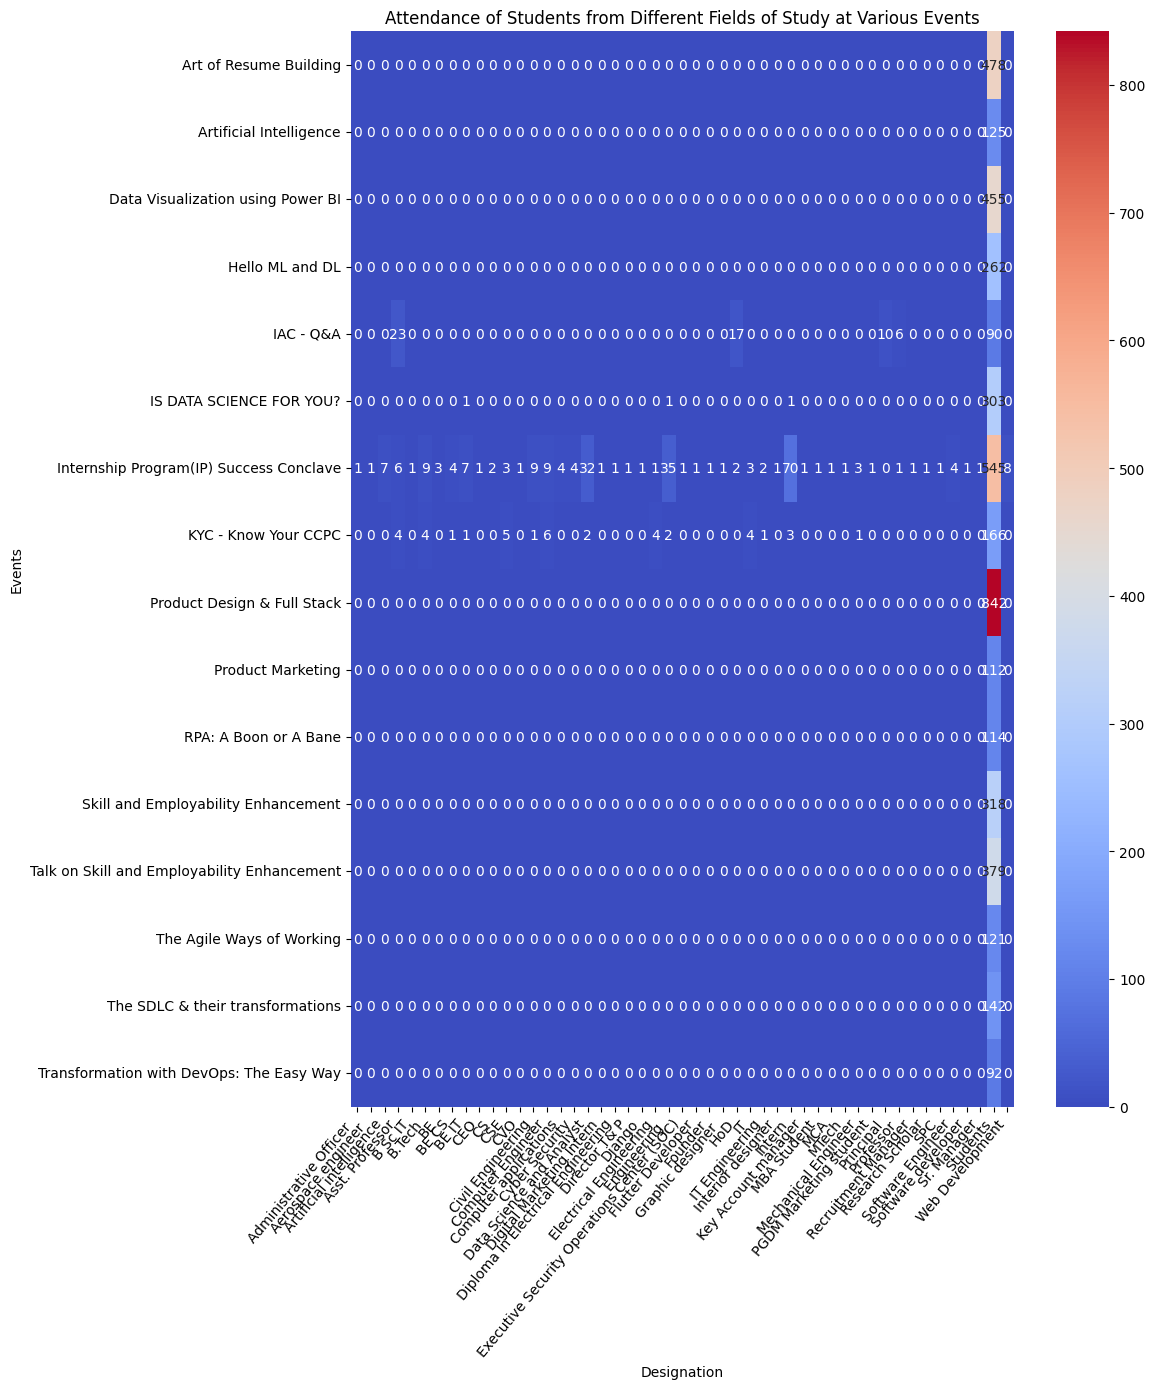

In [ ]:
# Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset, including column data types

# Perform data preprocessing if necessary (e.g., handling missing values, encoding categorical variables)

# Analyze the relationship between events and fields of study
# You can use various techniques such as cross-tabulation, visualization, and statistical testing

# Example: Cross-tabulation between events and fields of study
event_field_cross_tab = pd.crosstab(df['Events'], df['Designation'])

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(event_field_cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Attendance of Students from Different Fields of Study at Various Events')
plt.xlabel('Designation')
plt.ylabel('Events')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

# Perform statistical testing to determine the significance of relationships
# For example, you can use chi-square tests to assess the association between events and fields of study

# Interpret the results and draw conclusions about which events tend to attract more students from specific fields of study

# Make recommendations based on the analysis
# Provide insights on how event organizers can tailor events to attract students from specific fields of study

# Save or export the results as needed
# For example, you can save visualizations as image files or export analysis results to CSV files

12.Which event tend to attract more students from specific fields of study?

In [ ]:
# Assuming the DataFrame has columns for 'Event' and 'Designation'

# Group the data by designation and event, and count the number of students
designation_event_counts = df.groupby(['Designation', 'Events']).size().reset_index(name='Count')

# For each designation, find the event with the highest attendance
most_attended_events = designation_event_counts.loc[designation_event_counts.groupby('Designation')['Count'].idxmax()]

# Print the results
print(most_attended_events)

                                   Designation  \
0                      Administrative Officer    
1                          Aerospace engineer    
2                      Artificial intelligence   
3                              Asst. Professor   
6                                      B Sc IT   
7                                       B.Tech   
9                                           BE   
10                                       BE CS   
13                                       BE IT   
15                                         CEO   
16                                          CS   
18                                         CSE   
19                                         CVO   
20                           Civil Engineering   
22                           Computer Engineer   
24                       Computer applications   
25                              Cyber Security   
26                    Data Science and Analyst   
28                    Digital Marketing Intern   


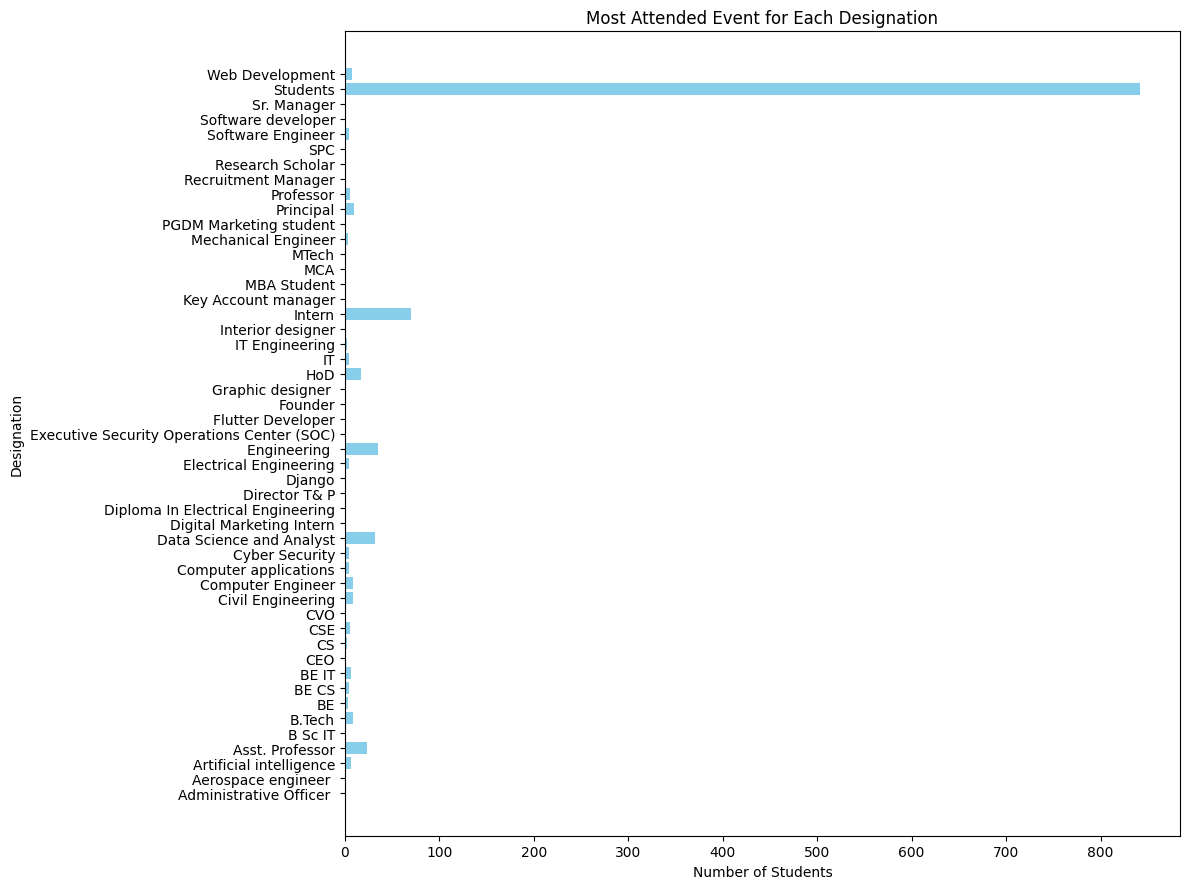

In [ ]:
# Plotting
plt.figure(figsize=(12,9))
plt.barh(most_attended_events['Designation'], most_attended_events['Count'], color='skyblue')
plt.title('Most Attended Event for Each Designation')
plt.xlabel('Number of Students')
plt.ylabel('Designation')
plt.tight_layout()
plt.show()

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df.columns

Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')

13..Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [ ]:
# Assuming the DataFrame has columns for 'CGPA' and 'Leadership- skills'

# Calculate the average CGPA for all students
average_cgpa_all_students = df['CGPA'].mean()

# Calculate the number of students with leadership skills (yes)
num_students_leadership_skills = (df['Leadership- skills'] == 'yes').sum()

# Calculate the mean CGPA for students with leadership skills
mean_cgpa_leadership_skills = df[df['Leadership- skills'] == 'yes']['CGPA'].mean()

# Calculate the number of students without leadership skills (no)
num_students_no_leadership_skills = len(df) - num_students_leadership_skills

# Calculate the mean CGPA for students without leadership skills
mean_cgpa_no_leadership_skills = df[df['Leadership- skills'] == 'no']['CGPA'].mean()

# Print the results
print("Average CGPA for All Students:", average_cgpa_all_students)
print("Number of Students with Leadership Skills:", num_students_leadership_skills)
print("Mean CGPA for Students with Leadership Skills:", mean_cgpa_leadership_skills)
print("Number of Students without Leadership Skills:", num_students_no_leadership_skills)
print("Mean CGPA for Students without Leadership Skills:", mean_cgpa_no_leadership_skills)

# Compare the mean CGPA of students with leadership skills to the overall mean CGPA
if mean_cgpa_leadership_skills > average_cgpa_all_students:
    print("Students with leadership skills tend to have a higher CGPA.")
elif mean_cgpa_leadership_skills < average_cgpa_all_students:
    print("Students with leadership skills tend to have a lower CGPA.")
else:
    print("Students with leadership skills have a similar CGPA compared to all students.")

Average CGPA for All Students: 8.038475684511647
Number of Students with Leadership Skills: 1631
Mean CGPA for Students with Leadership Skills: 8.036787247087677
Number of Students without Leadership Skills: 3263
Mean CGPA for Students without Leadership Skills: 8.040444274224436
Students with leadership skills tend to have a lower CGPA.


14. How many students are graduating by the end of 2024

In [ ]:
def count_graduating_students(df):
    # Assuming 'Year of Graduation' column contains the graduation year
    # and 'First Name' column contains the student's first name
    graduating_students = df[df['Year of Graduation'] == 2024]
    num_graduating_students = len(graduating_students)
    return num_graduating_students

num_graduating_students = count_graduating_students(df)
print("Number of students graduating by the end of 2024:", num_graduating_students)


Number of students graduating by the end of 2024: 1511


15: Which promotion channel brings in more student participations for the event?

In [ ]:
def count_participation_by_channel(df):
    # Assuming 'Events' column contains the promotional channels
    participation_by_channel = df['Events'].value_counts()
    return participation_by_channel

participation_by_channel = count_participation_by_channel(df)
most_participated_channel = participation_by_channel.idxmax()
participation_count = participation_by_channel.max()

print("Most participated channel:", most_participated_channel)
print("Number of participations:", participation_count)


Most participated channel: Product Design & Full Stack
Number of participations: 842


16:Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

In [ ]:
def count_students_attending_data_science_events(df):
    # Assuming 'Events' column contains the event names and 'First Name' column contains student names
    data_science_events = df[df['Events'].str.contains('data science', case=False)]
    num_students_attending = data_science_events['First Name'].nunique()
    return num_students_attending

num_students_attending_data_science_events = count_students_attending_data_science_events(df)
print("Total number of students attending data science events:", num_students_attending_data_science_events)


Total number of students attending data science events: 218


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
# Calculate the highest expected salary
highest_salary = df['Expected salary (Lac)'].max()

print("Highest expected salary:", highest_salary)

Highest expected salary: 35


17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

Here i assumed high salary expectations , CGPA, and Experience in python.

In [ ]:
import pandas as pd

# Assuming 'df' contains the loaded DataFrame from the CSV file
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Data analyst Data.csv')

def parse_cgpa(cgpa_value):
    if isinstance(cgpa_value, str):
        # Split the CGPA string and take the first part
        return float(cgpa_value.split('/')[0])
    else:
        # If the value is already a float, return it as is
        return cgpa_value

def filter_students(df, cgpa_threshold, language_exp_threshold, salary_expectation_threshold):
    # Parse CGPA values
    df['CGPA'] = df['CGPA'].apply(parse_cgpa)

    # Filter students with high CGPA
    high_cgpa_students = df[df['CGPA'] >= cgpa_threshold]

    # Filter students with more language experience
    high_exp_students = df[df['Experience with python (Months)'] >= language_exp_threshold]

    # Filter students with high salary expectation
    high_salary_expectation_students = df[df['Expected salary (Lac)'] >= salary_expectation_threshold]

    # Find the intersection of the three groups
    high_cgpa_exp_students = high_cgpa_students[high_cgpa_students['First Name'].isin(high_exp_students['First Name'])]

    # Calculate average expected salary for these students
    average_salary_expectation = high_cgpa_exp_students['Expected salary (Lac)'].mean()

    return high_cgpa_students, high_exp_students, high_salary_expectation_students, high_cgpa_exp_students, average_salary_expectation

cgpa_threshold = 9.5  # Set the CGPA threshold as 9.5 or higher
language_exp_threshold = 7  # Set the language experience threshold (in months)
salary_expectation_threshold = 30  # Set the salary expectation threshold (in Lac)
high_cgpa_students, high_exp_students, high_salary_expectation_students, high_cgpa_exp_students, avg_salary_expectation = filter_students(df, cgpa_threshold, language_exp_threshold, salary_expectation_threshold)

# Filtered students
print("Students with CGPA 9.5 or higher ({} students):".format(len(high_cgpa_students)))
print(high_cgpa_students['First Name'])

print("\nStudents with more than 7 months of language experience ({} students):".format(len(high_exp_students)))
print(high_exp_students['First Name'])

print("\nStudents with expected salary of 30 Lac or more ({} students):".format(len(high_salary_expectation_students)))
print(high_salary_expectation_students['First Name'])

print("\nStudents with CGPA 9.5 or higher and more than 7 months of language experience ({} students):".format(len(high_cgpa_exp_students)))
print(high_cgpa_exp_students['First Name'])

print("\nAverage expected salary for students with CGPA 9.5 or higher and more than 7 months of language experience:", avg_salary_expectation)


Students with CGPA 9.5 or higher (535 students):
12       Pranali
14          Saba
15       Apurva 
16        Tanmay
20       Shivani
          ...   
4860        Siva
4865     Savinay
4875       Haiya
4877    KASUNDRA
4886     UJJAWAL
Name: First Name, Length: 535, dtype: object

Students with more than 7 months of language experience (1440 students):
0                ANIKET
3                 Pooja
6                 Durga
14                 Saba
18             Shubham 
             ...       
4881          Meghkumar
4882             SRUJAL
4883            Pethani
4888    Prajapati Ankit
4893            Lankesh
Name: First Name, Length: 1440, dtype: object

Students with expected salary of 30 Lac or more (81 students):
87            Ninad
140          Pratik
217        Shraddha
278          Mayuri
469          Vedant
           ...     
4697      Prabhakar
4752              R
4767         Sampat
4840    S.Ackshaiya
4875          Haiya
Name: First Name, Length: 81, dtype: object

Studen

18. How many students know about the event from their colleges? Which of there Top 5 colleges?

In [ ]:
import pandas as pd

# Assuming 'df' contains the loaded DataFrame from the CSV file
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Data analyst Data.csv')

# Count the number of students who know about the event from SPOC / College Professor
num_students_from_spo_col_prof = df[df['How did you come to know about this event?'] == 'SPOC/ College Professor'].shape[0]

print("Number of students who know about the event from SPOC / College Professor:", num_students_from_spo_col_prof)


Number of students who know about the event from SPOC / College Professor: 326
